In [1]:
!pip install pandas numpy scikit-learn joblib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\raman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## ✅ Cell 1 — Load Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import joblib

df = pd.read_csv(r"E:\\Data Science Projects data sets\\House Prediction\\House_data.csv")

df_head = df.head()
data_shape = df.shape

df_head, data_shape


(           id             date     price  bedrooms  bathrooms  sqft_living  \
 0  7129300520  20141013T000000  221900.0         3       1.00         1180   
 1  6414100192  20141209T000000  538000.0         3       2.25         2570   
 2  5631500400  20150225T000000  180000.0         2       1.00          770   
 3  2487200875  20141209T000000  604000.0         4       3.00         1960   
 4  1954400510  20150218T000000  510000.0         3       2.00         1680   
 
    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
 0      5650     1.0           0     0  ...      7        1180              0   
 1      7242     2.0           0     0  ...      7        2170            400   
 2     10000     1.0           0     0  ...      6         770              0   
 3      5000     1.0           0     0  ...      7        1050            910   
 4      8080     1.0           0     0  ...      8        1680              0   
 
    yr_built  yr_renovated  zipcode 

## ✅ Cell 2 — Dataset Information & Summary

In [3]:
df_info = df.info()
missing_values = df.isnull().sum()
summary_stats = df.describe().T  

missing_values, summary_stats.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

(id               0
 date             0
 price            0
 bedrooms         0
 bathrooms        0
 sqft_living      0
 sqft_lot         0
 floors           0
 waterfront       0
 view             0
 condition        0
 grade            0
 sqft_above       0
 sqft_basement    0
 yr_built         0
 yr_renovated     0
 zipcode          0
 lat              0
 long             0
 sqft_living15    0
 sqft_lot15       0
 dtype: int64,
                count          mean           std        min           25%  \
 id           21613.0  4.580302e+09  2.876566e+09  1000102.0  2.123049e+09   
 price        21613.0  5.401822e+05  3.673622e+05    75000.0  3.219500e+05   
 bedrooms     21613.0  3.370842e+00  9.300618e-01        0.0  3.000000e+00   
 bathrooms    21613.0  2.114757e+00  7.701632e-01        0.0  1.750000e+00   
 sqft_living  21613.0  2.079900e+03  9.184409e+02      290.0  1.427000e+03   
 
                       50%           75%           max  
 id           3.904930e+09  7.308900e+

## ✅ Cell 3 — Clean Data

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df_model = df.drop(columns=['id', 'date'])
df_model.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## ✅ Cell 4 — Select Features & Target

In [5]:
y = df_model['price']
X = df_model.drop(columns=['price'])

X.columns, X.shape, y.shape


(Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
        'sqft_living15', 'sqft_lot15'],
       dtype='object'),
 (21613, 18),
 (21613,))

## ✅ Cell 5 — Train/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((17290, 18), (4323, 18), (17290,), (4323,))

## ✅ Cell 6 — Train Model

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

"Model training completed!"


'Model training completed!'

## ✅ Cell 7 — Evaluate Model

In [8]:
# PHASE 6: EVALUATION (Updated for compatibility)

# 1) Predict using test data
y_pred = model.predict(X_test)

# 2) RMSE Calculation (manually)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 3) R² Score
r2 = r2_score(y_test, y_pred)

rmse, r2


(np.float64(148825.23263772638), 0.8536619649280525)

## ✅ Cell 8 — Save Model

In [9]:
joblib.dump(model, "house_price_model.pkl")
"model saved"


'model saved'

## 📊 Now We Add Full EDA Section With Plots

### 📌 Cell 9 — Install & Import Visualization Libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")


### 📌 Cell 10 — Price Distribution

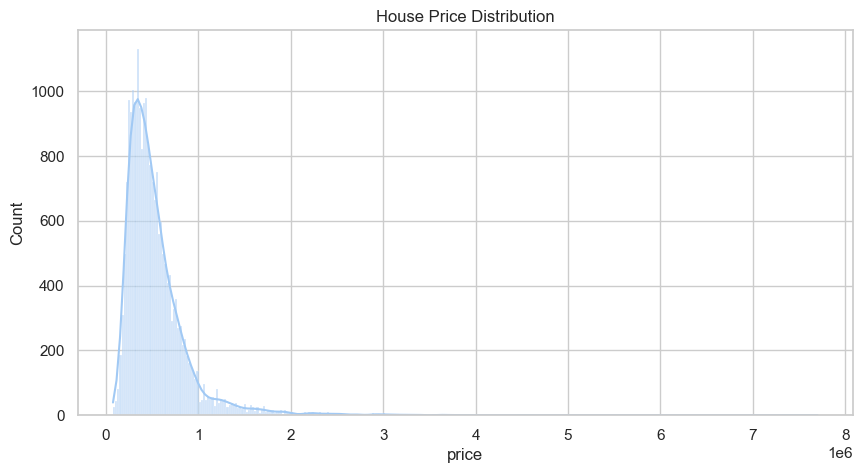

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], kde=True)
plt.title("House Price Distribution")
plt.show()


### 📌 Cell 11 — Correlation Heatmap

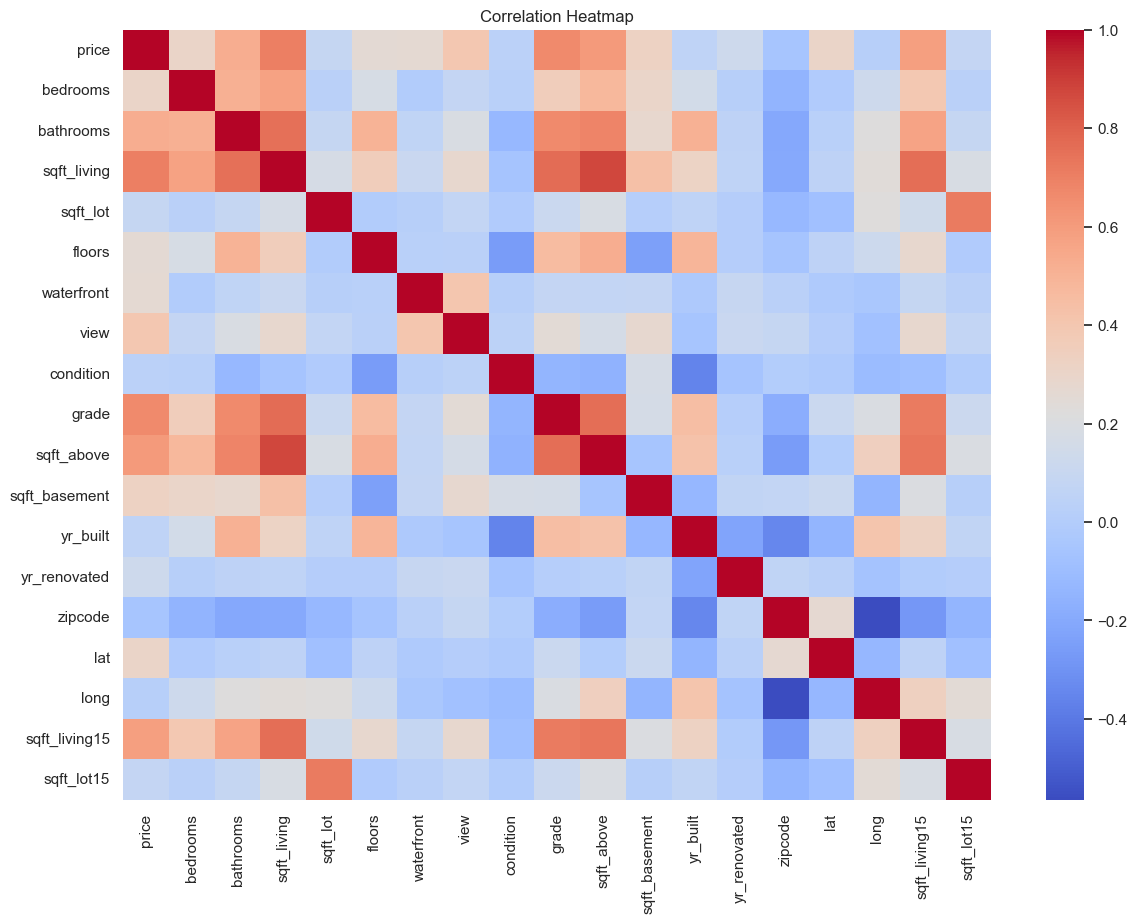

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(df_model.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### 📌 Cell 12 — Pairplot

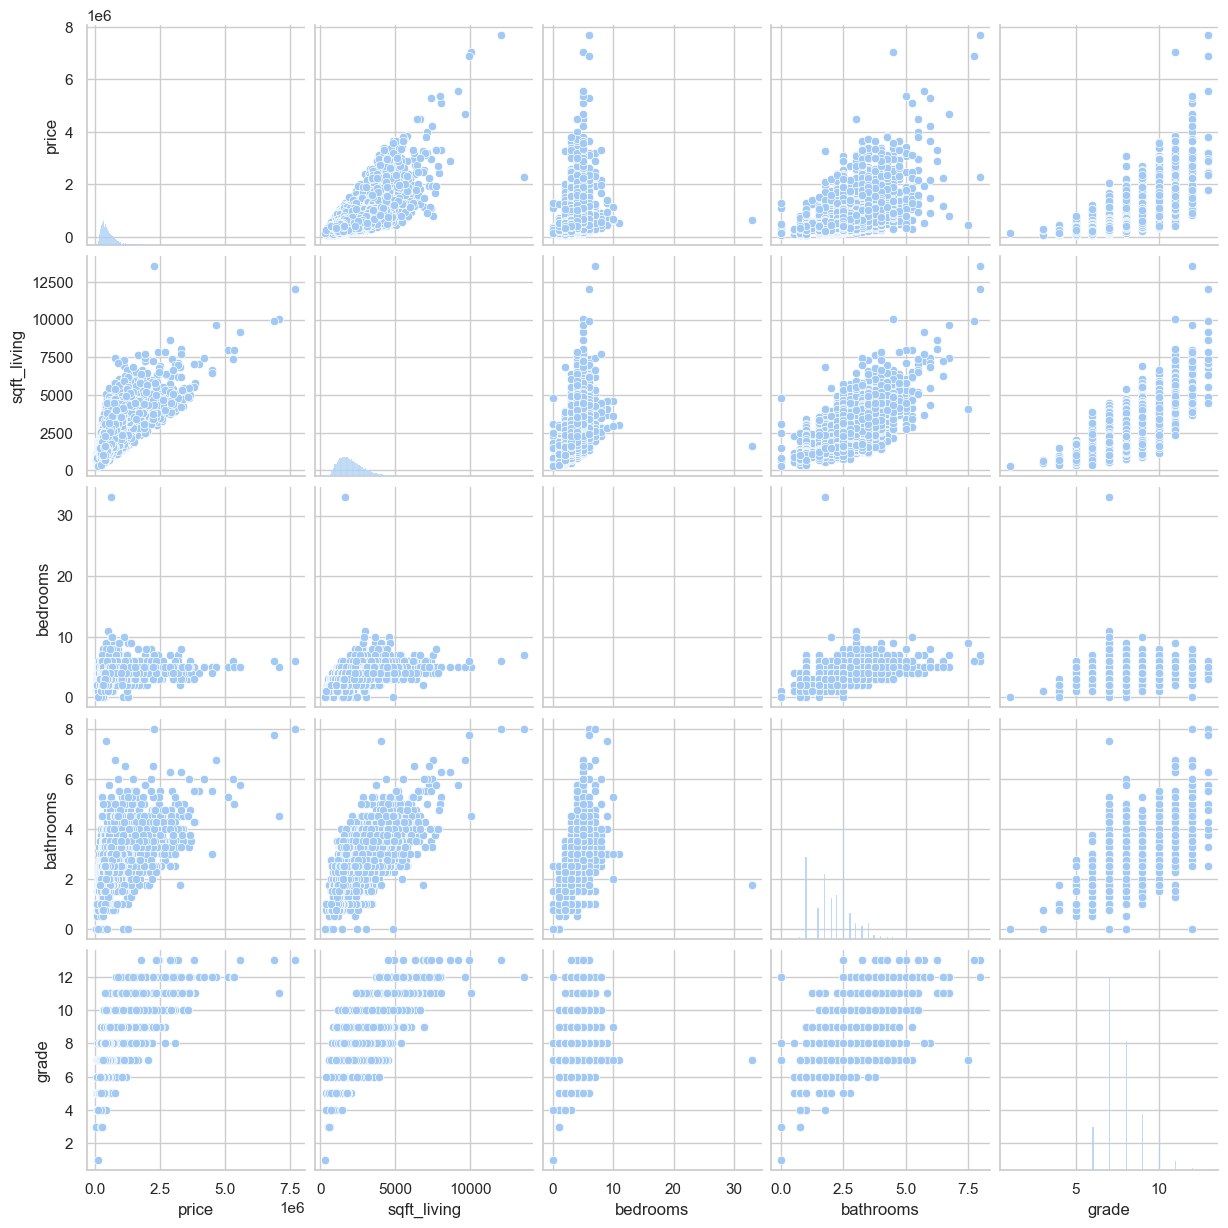

In [13]:
sns.pairplot(df_model[['price','sqft_living','bedrooms','bathrooms','grade']])


### 📌 Cell 13 — Boxplot: Bedrooms vs Price

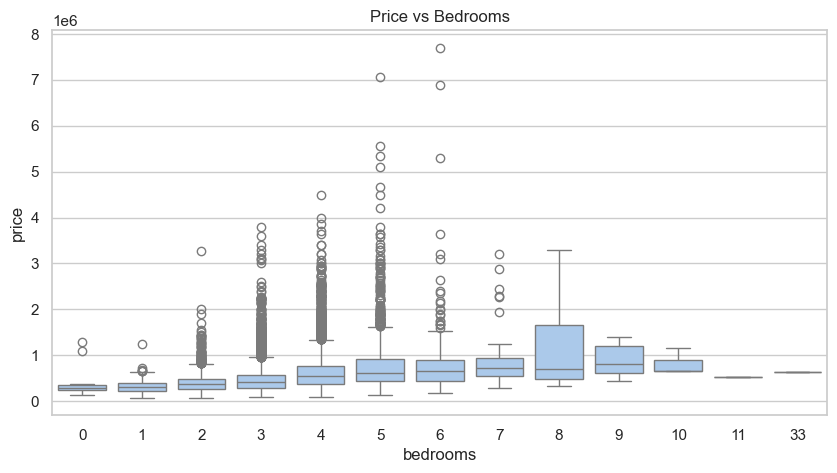

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title("Price vs Bedrooms")
plt.show()


### 📌 Cell 14 — Feature Importance Plot

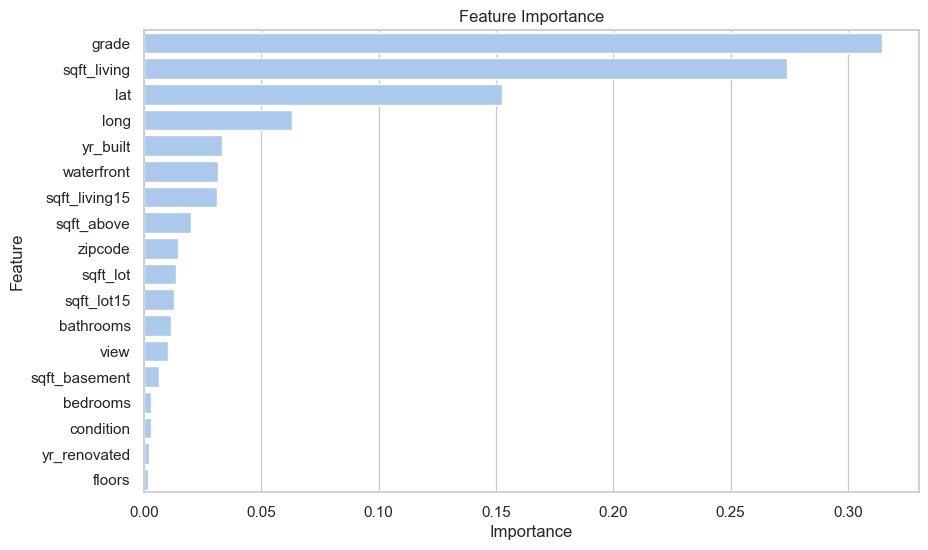

,Feature,Importance
8,grade,0.314470
2,sqft_living,0.273825
14,lat,0.152630
15,long,0.063270
11,yr_built,0.033160
5,waterfront,0.031770
16,sqft_living15,0.031252
9,sqft_above,0.020020
13,zipcode,0.014683
3,sqft_lot,0.013735


In [15]:
importances = model.feature_importances_
feature_imp_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_imp_df)
plt.title("Feature Importance")
plt.show()

feature_imp_df.head(10)


### Create / Finalize app.py inside Jupyter Notebook

In [16]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# ---------- PAGE CONFIG ----------
st.set_page_config(
    page_title="House Price Prediction",
    page_icon="🏠",
    layout="centered"
)

# ---------- LOAD MODEL ----------
@st.cache_resource
def load_model():
    model = joblib.load("house_price_model.pkl")
    return model

model = load_model()

# ---------- APP TITLE & DESCRIPTION ----------
st.title("🏠 House Price Prediction App")
st.markdown("""
Welcome to the **House Price Prediction** tool.  

Enter house details in the sidebar, and the app will estimate the **price** based on a machine learning model trained on historical data.
""")

st.sidebar.header("🔧 Input House Details")

# ---------- SIDEBAR INPUTS ----------
bedrooms = st.sidebar.slider("Bedrooms", 0, 10, 3)
bathrooms = st.sidebar.slider("Bathrooms", 0.0, 5.0, 2.0, step=0.25)
sqft_living = st.sidebar.number_input("Living Area (sqft)", 200, 10000, 1800)
sqft_lot = st.sidebar.number_input("Lot Size (sqft)", 500, 1000000, 5000)
floors = st.sidebar.slider("Floors", 1.0, 4.0, 1.0, step=0.5)
waterfront = st.sidebar.selectbox("Waterfront", [0, 1], format_func=lambda x: "No" if x == 0 else "Yes")
view = st.sidebar.slider("View (0–4)", 0, 4, 0)
condition = st.sidebar.slider("Condition (1–5)", 1, 5, 3)
grade = st.sidebar.slider("Grade (1–13)", 1, 13, 7)
sqft_above = st.sidebar.number_input("Sqft Above Ground", 200, 10000, 1500)
sqft_basement = st.sidebar.number_input("Sqft Basement", 0, 5000, 0)
yr_built = st.sidebar.number_input("Year Built", 1900, 2025, 1990)
yr_renovated = st.sidebar.number_input("Year Renovated (0 if never)", 0, 2025, 0)
lat = st.sidebar.number_input("Latitude", 47.0, 48.0, 47.5)
long = st.sidebar.number_input("Longitude", -123.0, -121.0, -122.2)
sqft_living15 = st.sidebar.number_input("Living Area (15 neighbors)", 200, 10000, 1800)
sqft_lot15 = st.sidebar.number_input("Lot Size (15 neighbors)", 500, 1000000, 5000)

# ---------- INPUT DATAFRAME ----------
input_data = pd.DataFrame({
    "bedrooms": [bedrooms],
    "bathrooms": [bathrooms],
    "sqft_living": [sqft_living],
    "sqft_lot": [sqft_lot],
    "floors": [floors],
    "waterfront": [waterfront],
    "view": [view],
    "condition": [condition],
    "grade": [grade],
    "sqft_above": [sqft_above],
    "sqft_basement": [sqft_basement],
    "yr_built": [yr_built],
    "yr_renovated": [yr_renovated],
    "lat": [lat],
    "long": [long],
    "sqft_living15": [sqft_living15],
    "sqft_lot15": [sqft_lot15]
})

st.subheader("📋 Your Input Summary")
st.write(input_data)

# ---------- PREDICTION BUTTON ----------
if st.button("🔮 Predict House Price"):
    prediction = model.predict(input_data)[0]
    st.success(f"Estimated House Price: **${prediction:,.0f}**")
    st.caption("Note: This is an estimate based on historical data and may not reflect current market conditions.")


Overwriting app.py
